https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

In [22]:
import tensorflow as tf
print(tf.__version__)

2.5.0


## Examples

In [47]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define the model
model = Sequential()
model.add(Dense(10, input_shape=(8,)))
model.add(Dense(1))
model

In [48]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define the model
model = Sequential()
model.add(Dense(100, input_shape=(8,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))
model

In [49]:
# example of a model defined with the functional api
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense

# define the layers
x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)

# define the model
model = Model(inputs=x_in, outputs=x_out)
model

## Develop Multilayer Perceptron Models (MLP)

### MLP for Binary Classification

In [51]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
df = read_csv('ionosphere.csv', header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,
       1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,
       -0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,
       -0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,
       -0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(235, 34) (116, 34) (235,) (116,)
Test Accuracy: 0.905
Predicted: 0.993


In [24]:
X_train[:2]

array([[ 1.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        -1.     ,  1.     ,  1.     ,  0.55172,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  1.     ,  1.     ,  0.     ,  0.     ,
         0.     ,  0.     ,  0.     ,  0.     ],
       [ 1.     ,  0.     ,  1.     ,  0.08013,  0.96775, -0.00482,
         0.96683, -0.00722,  0.8798 , -0.03923,  1.     ,  0.01419,
         0.96186, -0.01436,  0.95947, -0.01671,  0.98497,  0.01002,
         0.91152, -0.08848,  0.95016, -0.02364,  0.94636, -0.02591,
         0.98164,  0.02003,  0.93772, -0.03034,  1.     , -0.05843,
         0.92774, -0.03464,  0.92226, -0.03673]], dtype=float32)

In [25]:
y_train[:20]

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0])

### MLP for Multiclass Classification

In [26]:
# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
df = read_csv('iris.csv', header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

(100, 4) (50, 4) (100,) (50,)
Test Accuracy: 0.780
Predicted: [[0.97428775 0.00474996 0.02096232]] (class=0)


In [27]:
X_train[:5]

array([[6.8, 3.2, 5.9, 2.3],
       [5. , 3.3, 1.4, 0.2],
       [6.7, 3. , 5. , 1.7],
       [5.9, 3. , 5.1, 1.8],
       [4.6, 3.1, 1.5, 0.2]], dtype=float32)

In [28]:
y_train[:20]

array([2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 0])

### MLP for Regression

In [29]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
df = read_csv('housing.csv', header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse')

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(339, 13) (167, 13) (339,) (167,)
MSE: 58.092, RMSE: 7.622
Predicted: 26.922


In [30]:
X_train[:2]

array([[5.6020e-02, 0.0000e+00, 2.4600e+00, 0.0000e+00, 4.8800e-01,
        7.8310e+00, 5.3600e+01, 3.1992e+00, 3.0000e+00, 1.9300e+02,
        1.7800e+01, 3.9263e+02, 4.4500e+00],
       [8.8290e-02, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01,
        6.0120e+00, 6.6600e+01, 5.5605e+00, 5.0000e+00, 3.1100e+02,
        1.5200e+01, 3.9560e+02, 1.2430e+01]])

In [31]:
y_train[:20]

array([50. , 22.9, 16.4, 11.3, 18.6, 23.8, 22.9, 20.6, 18.5, 17.8, 25. ,
       12.7, 18.5, 15. , 10.2, 16. , 19.7, 15.7, 22.4, 29.1])

## Develop Convolutional Neural Network Models (CNN)

### CNN for image classification in MNIST handwritten digits

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


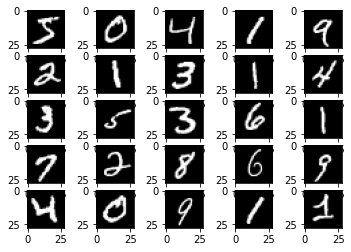

In [32]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot

# load dataset
(trainX, trainy), (testX, testy) = load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images
for i in range(25):
    # define subplot
    pyplot.subplot(5, 5, i+1)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

# show the figure
pyplot.show()

### CNN model on the MNIST dataset

In [44]:
# example of a cnn for image classification
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# load dataset
(x_train, y_train), (x_test, y_test) = load_data()

# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

# determine the shape of the input images
in_shape = x_train.shape[1:]

# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)

# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)

# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

# make a prediction
image = x_train[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

(28, 28, 1) 10
Accuracy: 0.986
Predicted: class=5


In [45]:
X_train[:1]

array([[[ 6550.],
        [ 8728.],
        [12026.],
        [14395.],
        [14587.]]], dtype=float32)

In [46]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

## Develop Recurrent Neural Network Models (RNN)

### LSTM for a univariate time series forecasting problem

In [36]:
# lstm for time series forecasting
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return asarray(X), asarray(y)

# load the dataset
df = read_csv('monthly-car-sales.csv', header=0, index_col=0, squeeze=True)

# retrieve the values
values = df.values.astype('float32')

# specify the window size
n_steps = 5

# split into samples
X, y = split_sequence(values, n_steps)

# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# fit the model
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=2, validation_data=(X_test, y_test))

# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))

(91, 5, 1) (12, 5, 1) (91,) (12,)
Epoch 1/350
3/3 - 1s - loss: 10156506112.0000 - mae: 98028.5859 - val_loss: 9313387520.0000 - val_mae: 95925.7734
Epoch 2/350
3/3 - 0s - loss: 4993944064.0000 - mae: 69143.2891 - val_loss: 5219676672.0000 - val_mae: 71877.4766
Epoch 3/350
3/3 - 0s - loss: 2773488384.0000 - mae: 51360.2656 - val_loss: 2666469376.0000 - val_mae: 51184.1250
Epoch 4/350
3/3 - 0s - loss: 1412088832.0000 - mae: 36627.3906 - val_loss: 1245964160.0000 - val_mae: 34913.1680
Epoch 5/350
3/3 - 0s - loss: 636040448.0000 - mae: 24402.3711 - val_loss: 454653600.0000 - val_mae: 20788.7676
Epoch 6/350
3/3 - 0s - loss: 215616976.0000 - mae: 13839.2266 - val_loss: 97145608.0000 - val_mae: 8787.5459
Epoch 7/350
3/3 - 0s - loss: 42022460.0000 - mae: 5368.4473 - val_loss: 23293942.0000 - val_mae: 4348.4067
Epoch 8/350
3/3 - 0s - loss: 21568114.0000 - mae: 3690.3547 - val_loss: 77725800.0000 - val_mae: 7603.9995
Epoch 9/350
3/3 - 0s - loss: 66285564.0000 - mae: 6961.9438 - val_loss: 1688947

Epoch 77/350
3/3 - 0s - loss: 10301707.0000 - mae: 2482.9805 - val_loss: 12471700.0000 - val_mae: 3194.6829
Epoch 78/350
3/3 - 0s - loss: 10268082.0000 - mae: 2478.7168 - val_loss: 12447471.0000 - val_mae: 3192.6670
Epoch 79/350
3/3 - 0s - loss: 10248790.0000 - mae: 2475.6897 - val_loss: 12419432.0000 - val_mae: 3187.9363
Epoch 80/350
3/3 - 0s - loss: 10236102.0000 - mae: 2472.8257 - val_loss: 12384164.0000 - val_mae: 3168.0566
Epoch 81/350
3/3 - 0s - loss: 10211623.0000 - mae: 2468.1404 - val_loss: 12364576.0000 - val_mae: 3175.1853
Epoch 82/350
3/3 - 0s - loss: 10168612.0000 - mae: 2462.4702 - val_loss: 12327555.0000 - val_mae: 3159.3018
Epoch 83/350
3/3 - 0s - loss: 10145352.0000 - mae: 2457.9209 - val_loss: 12302643.0000 - val_mae: 3157.6121
Epoch 84/350
3/3 - 0s - loss: 10117259.0000 - mae: 2454.3691 - val_loss: 12269532.0000 - val_mae: 3148.8362
Epoch 85/350
3/3 - 0s - loss: 10087845.0000 - mae: 2448.9749 - val_loss: 12241445.0000 - val_mae: 3151.0020
Epoch 86/350
3/3 - 0s - loss

Epoch 153/350
3/3 - 0s - loss: 9101665.0000 - mae: 2337.4072 - val_loss: 10974903.0000 - val_mae: 2936.0879
Epoch 154/350
3/3 - 0s - loss: 9156283.0000 - mae: 2352.1543 - val_loss: 11011904.0000 - val_mae: 2978.9531
Epoch 155/350
3/3 - 0s - loss: 9094567.0000 - mae: 2342.9060 - val_loss: 10962517.0000 - val_mae: 2950.8203
Epoch 156/350
3/3 - 0s - loss: 9074035.0000 - mae: 2338.3188 - val_loss: 10918173.0000 - val_mae: 2915.4915
Epoch 157/350
3/3 - 0s - loss: 9077482.0000 - mae: 2336.5615 - val_loss: 10897659.0000 - val_mae: 2909.3352
Epoch 158/350
3/3 - 0s - loss: 9053222.0000 - mae: 2328.1335 - val_loss: 10883087.0000 - val_mae: 2868.2986
Epoch 159/350
3/3 - 0s - loss: 9047587.0000 - mae: 2324.1755 - val_loss: 10877171.0000 - val_mae: 2853.3025
Epoch 160/350
3/3 - 0s - loss: 9038284.0000 - mae: 2323.0442 - val_loss: 10864515.0000 - val_mae: 2868.3645
Epoch 161/350
3/3 - 0s - loss: 9056561.0000 - mae: 2332.0354 - val_loss: 10859511.0000 - val_mae: 2897.2317
Epoch 162/350
3/3 - 0s - los

Epoch 229/350
3/3 - 0s - loss: 8378255.5000 - mae: 2222.8086 - val_loss: 10309621.0000 - val_mae: 2689.7224
Epoch 230/350
3/3 - 0s - loss: 8336740.0000 - mae: 2219.5981 - val_loss: 10318975.0000 - val_mae: 2771.7903
Epoch 231/350
3/3 - 0s - loss: 8313109.0000 - mae: 2232.8076 - val_loss: 10423868.0000 - val_mae: 2844.8386
Epoch 232/350
3/3 - 0s - loss: 8323044.0000 - mae: 2240.6846 - val_loss: 10489103.0000 - val_mae: 2874.3918
Epoch 233/350
3/3 - 0s - loss: 8289530.5000 - mae: 2233.6155 - val_loss: 10455376.0000 - val_mae: 2839.0750
Epoch 234/350
3/3 - 0s - loss: 8358922.5000 - mae: 2224.7751 - val_loss: 10579642.0000 - val_mae: 2808.7893
Epoch 235/350
3/3 - 0s - loss: 8324415.5000 - mae: 2213.5591 - val_loss: 10533156.0000 - val_mae: 2835.9199
Epoch 236/350
3/3 - 0s - loss: 8333180.0000 - mae: 2220.8469 - val_loss: 10535839.0000 - val_mae: 2828.6707
Epoch 237/350
3/3 - 0s - loss: 8419704.0000 - mae: 2229.5356 - val_loss: 10573445.0000 - val_mae: 2851.6282
Epoch 238/350
3/3 - 0s - los

Epoch 305/350
3/3 - 0s - loss: 8364601.0000 - mae: 2247.4841 - val_loss: 11036847.0000 - val_mae: 2782.1199
Epoch 306/350
3/3 - 0s - loss: 8327005.0000 - mae: 2239.7261 - val_loss: 10944921.0000 - val_mae: 2767.4248
Epoch 307/350
3/3 - 0s - loss: 8290183.0000 - mae: 2221.7849 - val_loss: 10919796.0000 - val_mae: 2764.1562
Epoch 308/350
3/3 - 0s - loss: 8316933.5000 - mae: 2214.9658 - val_loss: 10926363.0000 - val_mae: 2769.6289
Epoch 309/350
3/3 - 0s - loss: 8360977.0000 - mae: 2223.3513 - val_loss: 10940335.0000 - val_mae: 2762.6794
Epoch 310/350
3/3 - 0s - loss: 8270479.0000 - mae: 2218.8428 - val_loss: 10936837.0000 - val_mae: 2762.3757
Epoch 311/350
3/3 - 0s - loss: 8274417.0000 - mae: 2218.2700 - val_loss: 10938911.0000 - val_mae: 2762.0906
Epoch 312/350
3/3 - 0s - loss: 8265269.5000 - mae: 2218.6824 - val_loss: 10940944.0000 - val_mae: 2761.3645
Epoch 313/350
3/3 - 0s - loss: 8278051.0000 - mae: 2218.9424 - val_loss: 10914253.0000 - val_mae: 2760.5996
Epoch 314/350
3/3 - 0s - los

In [37]:
X_train[:2]

array([[[ 6550.],
        [ 8728.],
        [12026.],
        [14395.],
        [14587.]],

       [[ 8728.],
        [12026.],
        [14395.],
        [14587.],
        [13791.]]], dtype=float32)

In [38]:
y_train[:20]

array([13791.,  9498.,  8251.,  7049.,  9545.,  9364.,  8456.,  7237.,
        9374., 11837., 13784., 15926., 13821., 11143.,  7975.,  7610.,
       10015., 12759.,  8816., 10677.], dtype=float32)

## Visualize a Deep Learning Model

### Model Text Description

In [39]:
# example of summarizing a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# summarize the model
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


### Model Architecture Plot

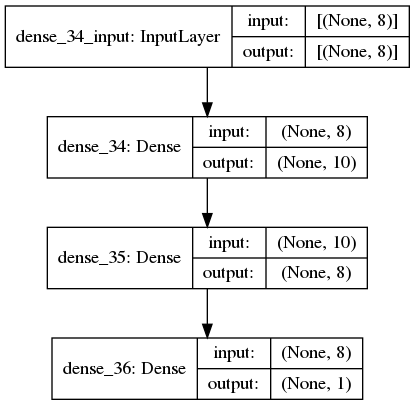

In [40]:
# example of plotting a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# summarize the model
plot_model(model, 'model.png', show_shapes=True)

## Plot Model Learning Curves

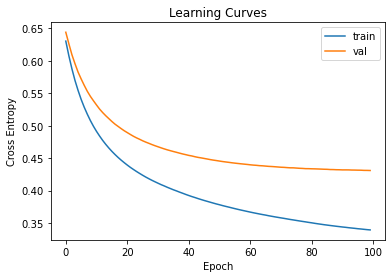

In [41]:
# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Save and Load Your Model

In [42]:
# example of saving a fit model
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

# save model to file
model.save('model.h5')

In [43]:
# example of loading a saved model
from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model

# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# load the model from file
model = load_model('model.h5')

# make a prediction
row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat[0])

Predicted: 0.839
